In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./results/mdi_local.two_subgroups_linear_sims/varying_heritability_n/seed331/results.csv")

In [3]:
df

,rep,n,n_name,heritability,heritability_name,n_estimators,min_samples_leaf,max_features,include_raw,model,...,time,split_seed,index,var,local_fi_score_group1_mean,local_fi_score_group2_mean,true_support_group1,true_support_group2,cor_with_signal_group1,cor_with_signal_group2
0,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,...,1.465369,331,0,0,0.150757,0.137608,1.0,0.0,NaN,0.420732
1,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,...,1.465369,331,0,1,0.114112,0.110453,1.0,0.0,NaN,0.304871
2,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,...,1.465369,331,0,2,0.189959,0.194374,1.0,0.0,NaN,0.216724
3,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,...,1.465369,331,0,3,0.196582,0.202870,1.0,0.0,NaN,0.290071
4,0,100,100,0.1,0.1,100,5,0.33,NaN,RF,...,1.465369,331,0,4,0.090747,0.085244,1.0,0.0,NaN,0.280937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0,1000,1000,0.8,0.8,100,5,0.33,NaN,RF,...,2.570868,331,71,15,0.042813,0.042632,0.0,0.0,0.060555,0.127854
1436,0,1000,1000,0.8,0.8,100,5,0.33,NaN,RF,...,2.570868,331,71,16,0.019961,0.021106,0.0,0.0,0.087549,0.128474
1437,0,1000,1000,0.8,0.8,100,5,0.33,NaN,RF,...,2.570868,331,71,17,0.023447,0.022730,0.0,0.0,0.113370,0.110828
1438,0,1000,1000,0.8,0.8,100,5,0.33,NaN,RF,...,2.570868,331,71,18,0.021922,0.023055,0.0,0.0,0.077788,0.117979


In [4]:
# methods = ["MDI_all_stumps", "MDI_sub_stumps", "MDI_all_stumps_without_raw", "MDI_sub_stumps_without_raw", "LFI_sum_absolute_all_stumps",
#            "LFI_absolute_sum_all_stumps", "LFI_sum_absolute_sub_stumps", "LFI_absolute_sum_sub_stumps", 
#            "LFI_sum_absolute_all_stumps_without_raw", "LFI_absolute_sum_all_stumps_without_raw",
#            "LFI_sum_absolute_sub_stumps_without_raw", "LFI_absolute_sum_sub_stumps_without_raw", "TreeSHAP", "LIME"]

methods = ["LFI_sum_absolute_all_stumps", "LFI_absolute_sum_all_stumps", "LFI_sum_absolute_all_stumps_without_raw", "LFI_absolute_sum_all_stumps_without_raw",
           "TreeSHAP", "LIME"]
sample_row_n = df["n"].unique().tolist()
sample_row_n.sort()
heritability = df["heritability"].unique().tolist()
heritability.sort()
nreps = df["rep"].max()
results = {}
for r in range(nreps+1):
    results[r] = {}
    for h in heritability:
        results[r][h] = {}
        for m in methods:
            results[r][h][m] = {}
            results[r][h][m]["auroc_group1_avg_metric"] = []
            results[r][h][m]["auroc_group2_avg_metric"] = []
            results[r][h][m]["auroc_group1_avg_prediction"] = []
            results[r][h][m]["auroc_group2_avg_prediction"] = []

In [5]:
for r in range(nreps+1):
    for h in heritability:
        for m in methods:
            for s in sample_row_n:
                df_sub = df[(df["fi"] == m) & (df["n"] == s) & (df["heritability"] == h) & (df["rep"] == r)]
                assert len(df_sub["rocauc_group1_avg_metric"].unique()) == 1
                assert len(df_sub["rocauc_group2_avg_metric"].unique()) == 1
                assert len(df_sub["rocauc_group1_avg_prediction"].unique()) == 1
                assert len(df_sub["rocauc_group2_avg_prediction"].unique()) == 1
                results[r][h][m]["auroc_group1_avg_metric"].append(df_sub["rocauc_group1_avg_metric"].unique()[0])
                results[r][h][m]["auroc_group2_avg_metric"].append(df_sub["rocauc_group2_avg_metric"].unique()[0])
                results[r][h][m]["auroc_group1_avg_prediction"].append(df_sub["rocauc_group1_avg_prediction"].unique()[0])
                results[r][h][m]["auroc_group2_avg_prediction"].append(df_sub["rocauc_group2_avg_prediction"].unique()[0])

In [6]:
agg_results = {} 
for h in heritability:
    agg_results[h] = {}
    for m in methods:
        agg_results[h][m] = {}
        agg_results[h][m]["auroc_group1_avg_metric"] = []
        agg_results[h][m]["auroc_group2_avg_metric"] = []
        agg_results[h][m]["auroc_group1_avg_prediction"] = []
        agg_results[h][m]["auroc_group2_avg_prediction"] = []

In [7]:
for h in heritability:
    for m in methods:
        for s in sample_row_n:
            agg_group1_avg_metric = 0
            agg_group2_avg_metric = 0
            agg_group1_avg_prediction = 0
            agg_group2_avg_prediction = 0
            for r in range(nreps+1):
                df_sub = df[(df["fi"] == m) & (df["n"] == s) & (df["heritability"] == h) & (df["rep"] == r)]
                assert len(df_sub["rocauc_group1_avg_metric"].unique()) == 1
                assert len(df_sub["rocauc_group2_avg_metric"].unique()) == 1
                assert len(df_sub["rocauc_group1_avg_prediction"].unique()) == 1
                assert len(df_sub["rocauc_group2_avg_prediction"].unique()) == 1
                agg_group1_avg_metric += df_sub["rocauc_group1_avg_metric"].unique()[0]
                agg_group2_avg_metric += df_sub["rocauc_group2_avg_metric"].unique()[0]
                agg_group1_avg_prediction += df_sub["rocauc_group1_avg_prediction"].unique()[0]
                agg_group2_avg_prediction += df_sub["rocauc_group2_avg_prediction"].unique()[0]
            agg_group1_avg_metric /= (nreps+1)
            agg_group2_avg_metric /= (nreps+1)
            agg_group1_avg_prediction /= (nreps+1)
            agg_group2_avg_prediction /= (nreps+1)
            agg_results[h][m]["auroc_group1_avg_metric"].append(agg_group1_avg_metric)
            agg_results[h][m]["auroc_group2_avg_metric"].append(agg_group2_avg_metric)
            agg_results[h][m]["auroc_group1_avg_prediction"].append(agg_group1_avg_prediction)
            agg_results[h][m]["auroc_group2_avg_prediction"].append(agg_group2_avg_prediction)

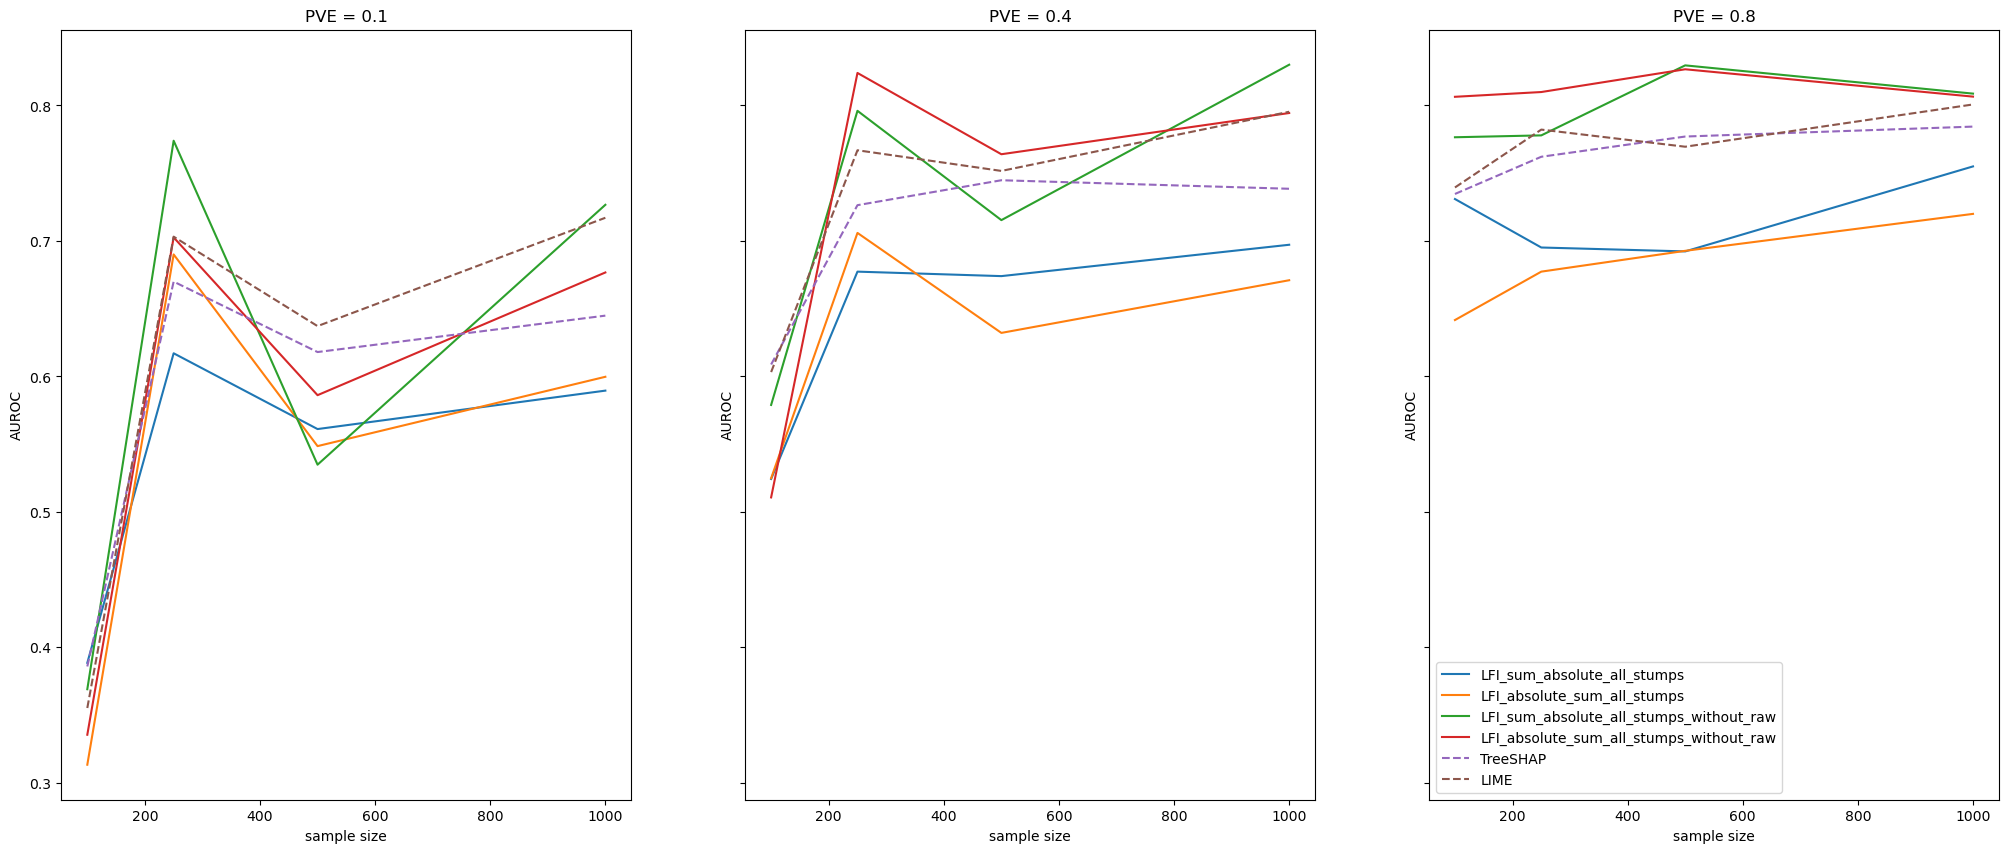

In [8]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 10), sharey=True)


for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        if m in ["TreeSHAP", "LIME"]:
            axs[i].plot(sample_row_n, agg_results[h][m]["auroc_group1_avg_metric"], label=m, linestyle='dashed')
        else:
            axs[i].plot(sample_row_n, agg_results[h][m]["auroc_group1_avg_metric"], label=m)
    axs[i].set_xlabel('sample size')
    axs[i].set_ylabel('AUROC')
    axs[i].set_title('PVE = ' + str(h))
    
# Share the label in the last plot
axs[3].legend()

# Show the plots
plt.show()

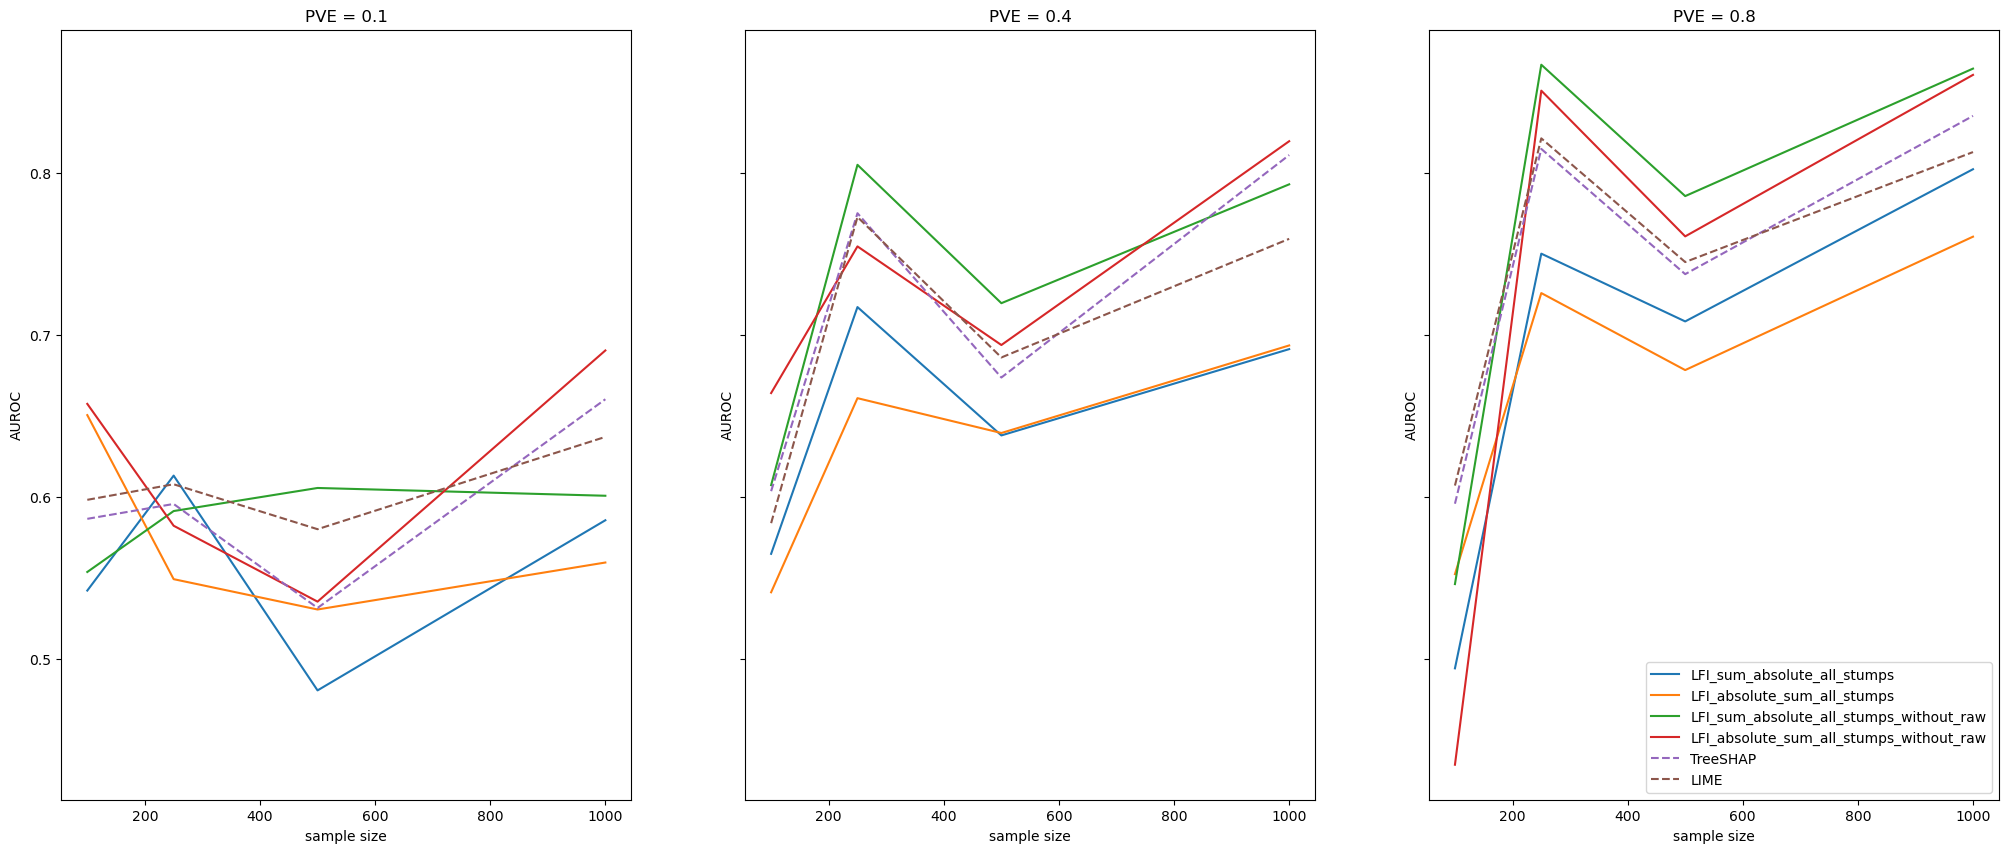

In [9]:
# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 10), sharey=True)



for i in range(len(heritability)):
    h = heritability[i]
    for m in methods:
        if m in ["TreeSHAP", "LIME"]:
            axs[i].plot(sample_row_n, agg_results[h][m]["auroc_group2_avg_metric"], label=m, linestyle='dashed')
        else:
            axs[i].plot(sample_row_n, agg_results[h][m]["auroc_group2_avg_metric"], label=m)
    axs[i].set_xlabel('sample size')
    axs[i].set_ylabel('AUROC')
    axs[i].set_title('PVE = ' + str(h))
    


# Share the label in the last plot
axs[3].legend()

# Show the plots
plt.show()

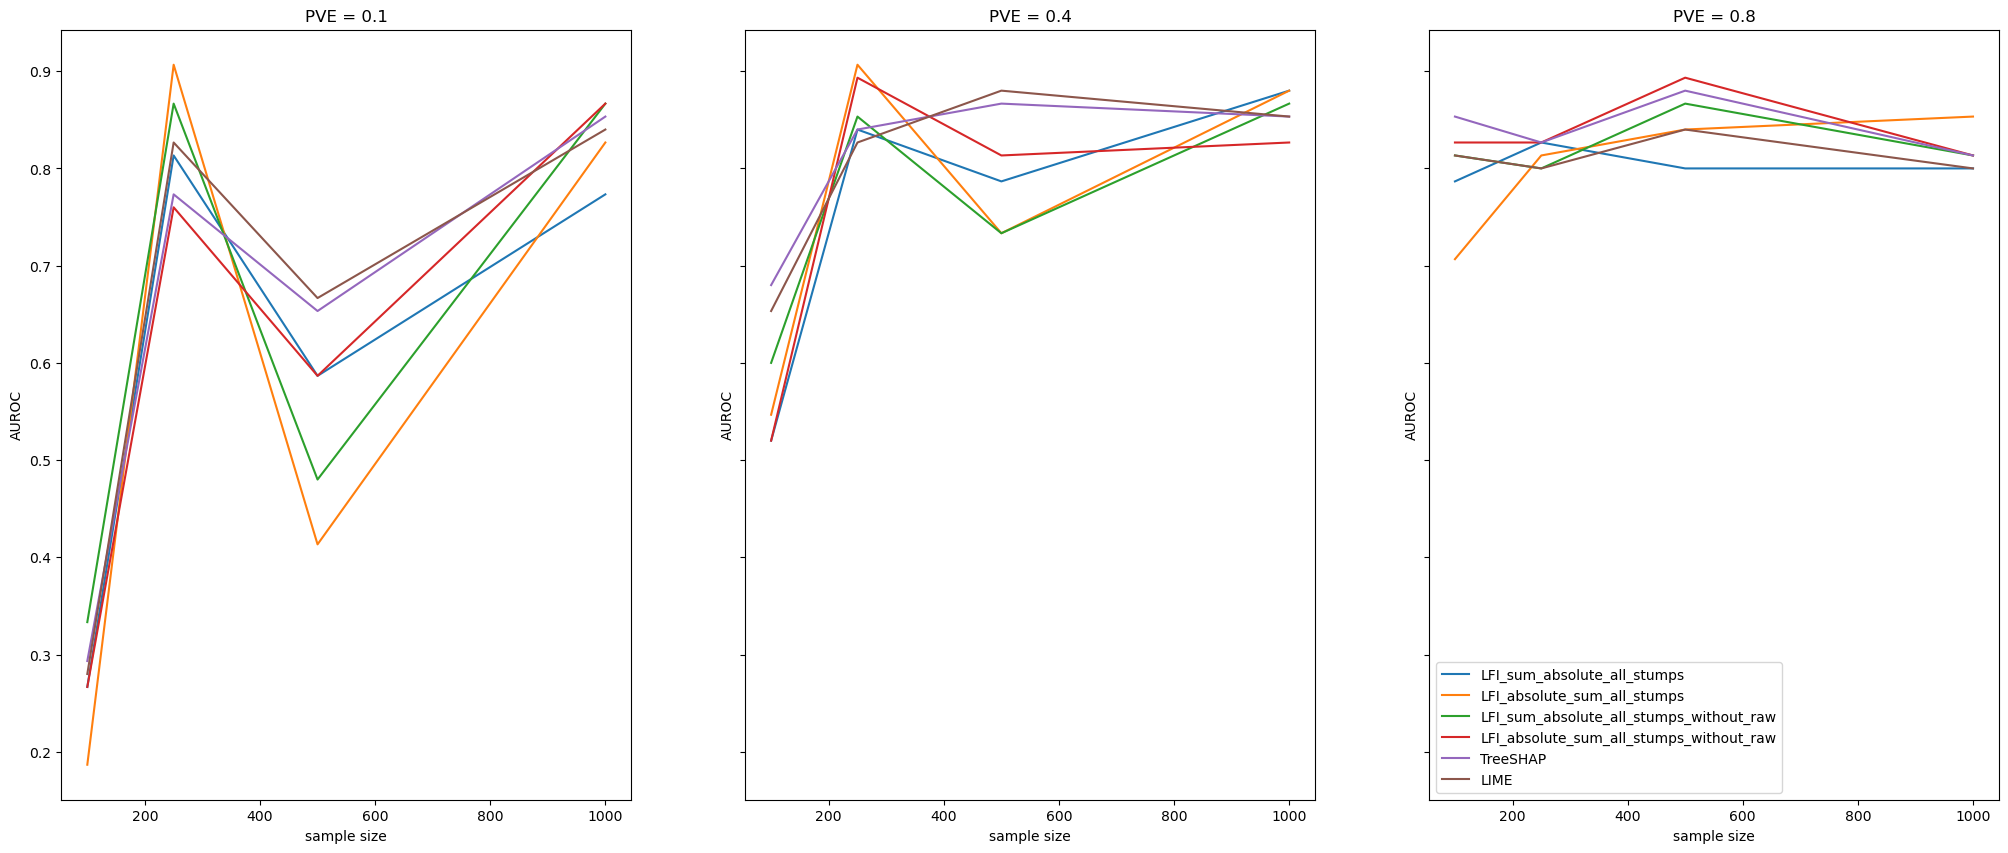

In [10]:
# # Create subplots
# fig, axs = plt.subplots(1, 3, figsize=(25, 10), sharey=True)


# for i in range(len(heritability)):
#     h = heritability[i]
#     for m in methods:
#         axs[i].plot(sample_row_n, agg_results[h][m]["auroc_group1_avg_prediction"], label=m)
#     axs[i].set_xlabel('sample size')
#     axs[i].set_ylabel('AUROC')
#     axs[i].set_title('PVE = ' + str(h))
    
# # Share the label in the last plot
# axs[2].legend()

# # Show the plots
# plt.show()

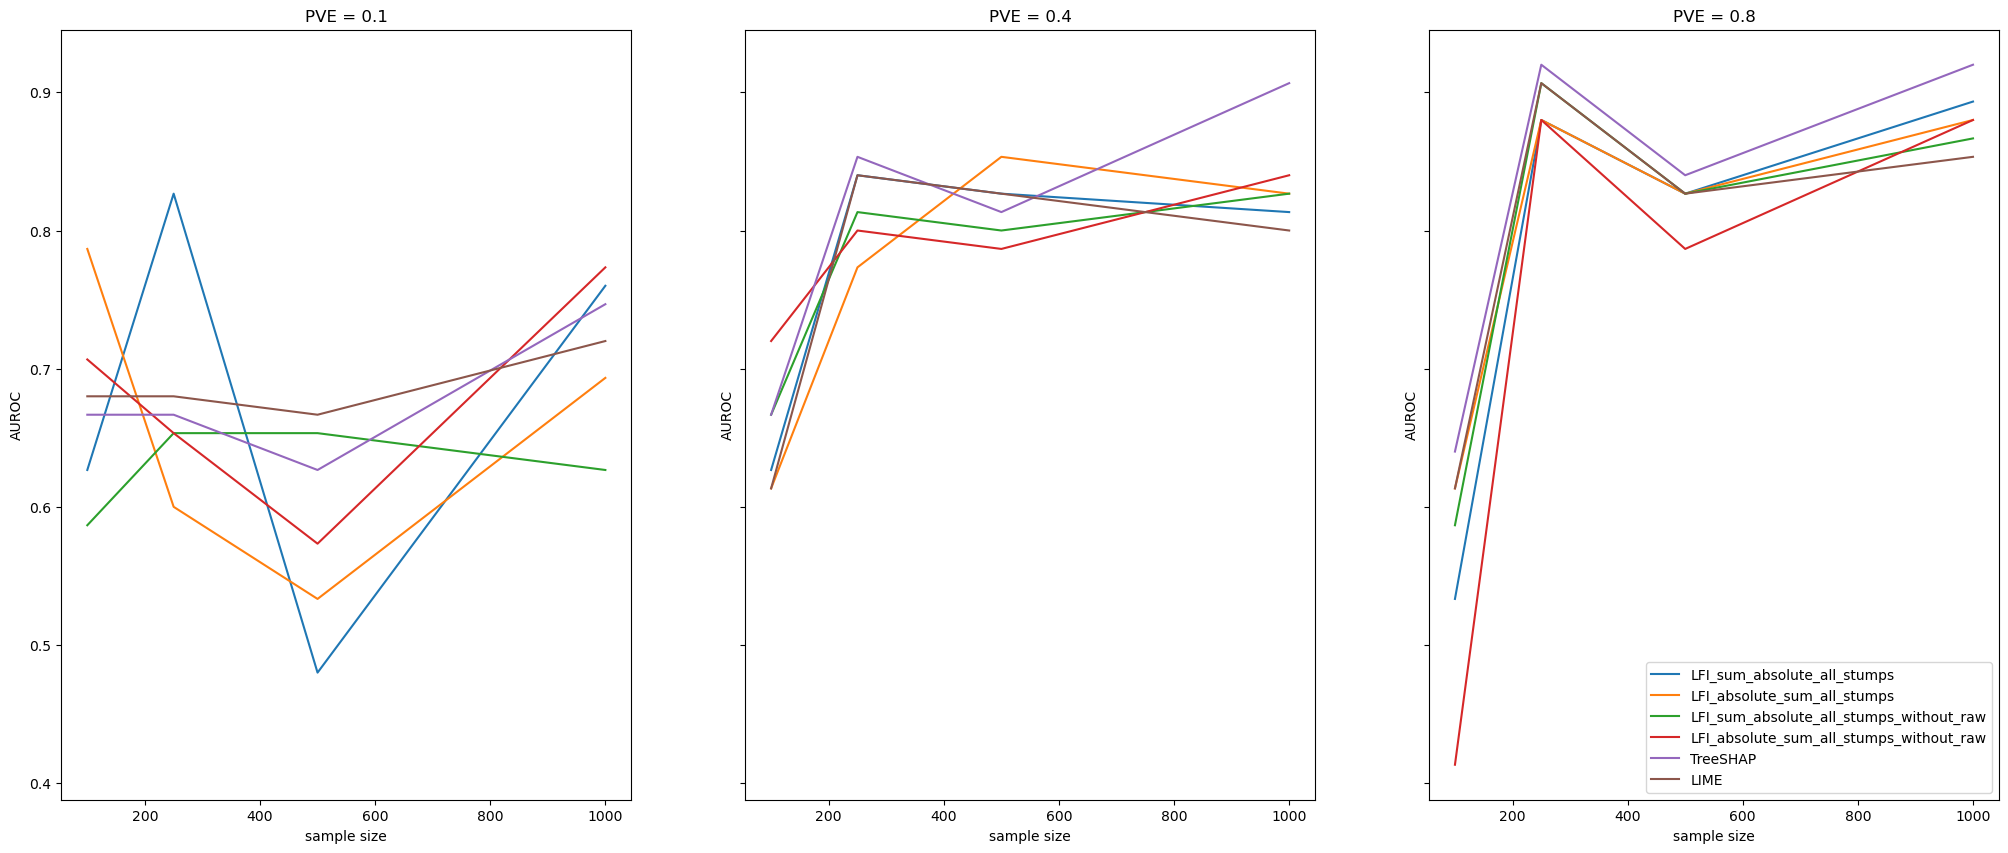

In [11]:
# # Create subplots
# fig, axs = plt.subplots(1, 3, figsize=(25, 10), sharey=True)


# for i in range(len(heritability)):
#     h = heritability[i]
#     for m in methods:
#         axs[i].plot(sample_row_n, agg_results[h][m]["auroc_group2_avg_prediction"], label=m)
#     axs[i].set_xlabel('sample size')
#     axs[i].set_ylabel('AUROC')
#     axs[i].set_title('PVE = ' + str(h))

# # Share the label in the last plot
# axs[2].legend()

# # Show the plots
# plt.show()